In [214]:
import pickle
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go

In [215]:
# Load the saved model
with open("./product_4A297_model.pkl", "rb") as model_file:
    loaded_model_data = pickle.load(model_file)

loaded_model = loaded_model_data["best_model"]
params = loaded_model_data["best_params"]
actual_df = loaded_model_data["actual_df"]
periods = loaded_model_data["periods"]
freq = loaded_model_data["freq"]

In [216]:
# actual_df["y"] = actual_df["y"].astype(int)
actual_df = actual_df[["ds", "y"]]

In [217]:
# # Make future predictions
# future = loaded_model.make_future_dataframe(periods=periods, freq=freq)
# forecast = loaded_model.predict(future)

In [218]:
# forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

In [219]:
# predicted_df = forecast[["ds", "yhat"]].tail(periods)
# predicted_df["yhat"] = predicted_df["yhat"].astype(int)
# predicted_df

In [220]:
actual_df

,ds,y
0,2013-01-07,400
1,2013-01-14,32526
2,2013-01-21,32952
3,2013-01-28,46317
4,2013-02-04,34153
...,...,...
631,2025-02-10,108958
632,2025-02-17,94029
633,2025-02-24,68713
634,2025-03-03,102922


In [221]:
# Split the data: 80% for training, 20% for testing
train_size = int(len(actual_df) * 0.95)
train_df = actual_df.iloc[:train_size]
test_df = actual_df.iloc[train_size:]

In [201]:
# Initialize and train the Prophet model on the training set
model = Prophet(
    changepoint_prior_scale=params['changepoint_prior_scale'],
    seasonality_prior_scale=params['seasonality_prior_scale'],
    holidays_prior_scale=params['holidays_prior_scale'],
    seasonality_mode=params['seasonality_mode']
)
model.fit(train_df)

18:13:31 - cmdstanpy - INFO - Chain [1] start processing
18:13:32 - cmdstanpy - INFO - Chain [1] done processing


In [202]:
future = model.make_future_dataframe(periods=len(test_df), freq=freq)
forecast = model.predict(future)

In [203]:
future

,ds
0,2013-01-07
1,2013-01-14
2,2013-01-21
3,2013-01-28
4,2013-02-04
...,...
631,2025-02-10
632,2025-02-17
633,2025-02-24
634,2025-03-03


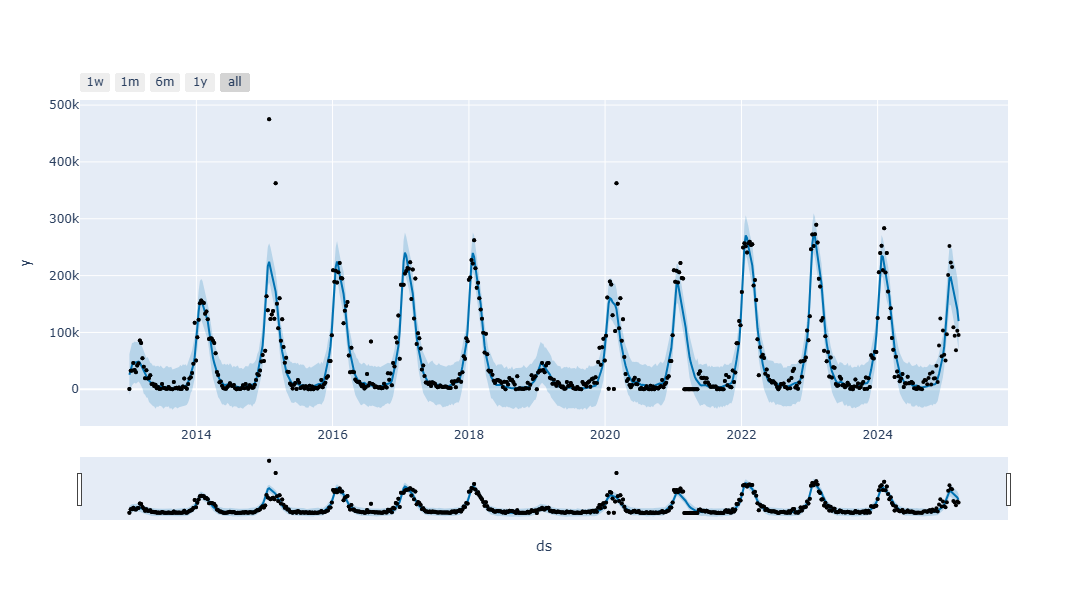

C:\Users\DevangBaroliya-DevRe\anaconda3\envs\devr-poc\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



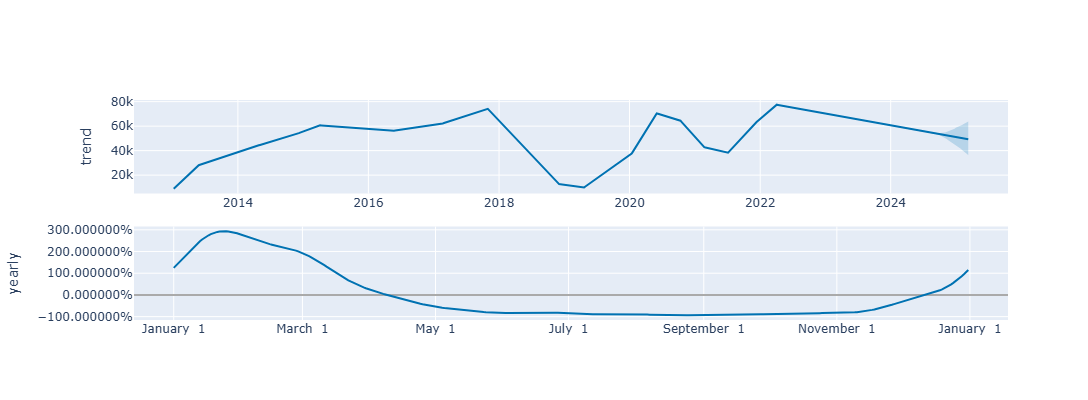

In [213]:
# Plot the best forecast
fig1 = plot_plotly(model, forecast, )

# Overlay actual data (historical) on the same plot
fig1.add_trace(go.Scatter(
    x=actual_df['ds'], 
    y=actual_df['y'], 
    mode='markers',
    name='Actual Data',
    marker=dict(color='black', size=4)
))

fig1.show()

fig2 = plot_components_plotly(model, forecast)
fig2.show()

In [205]:
# Extract the forecasted values for the test period
forecast_test = forecast.iloc[-len(test_df):].copy()

In [206]:
# Combine the forecast with the actual test data for evaluation
test_df = test_df.reset_index(drop=True)
test_df['yhat'] = forecast_test['yhat'].values

In [207]:
# Evaluate the forecast using Mean Absolute Error and Root Mean Squared Error
mae = mean_absolute_error(test_df['y'], test_df['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], test_df['yhat']))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 27532.861869030523
Root Mean Squared Error (RMSE): 36807.04635346198


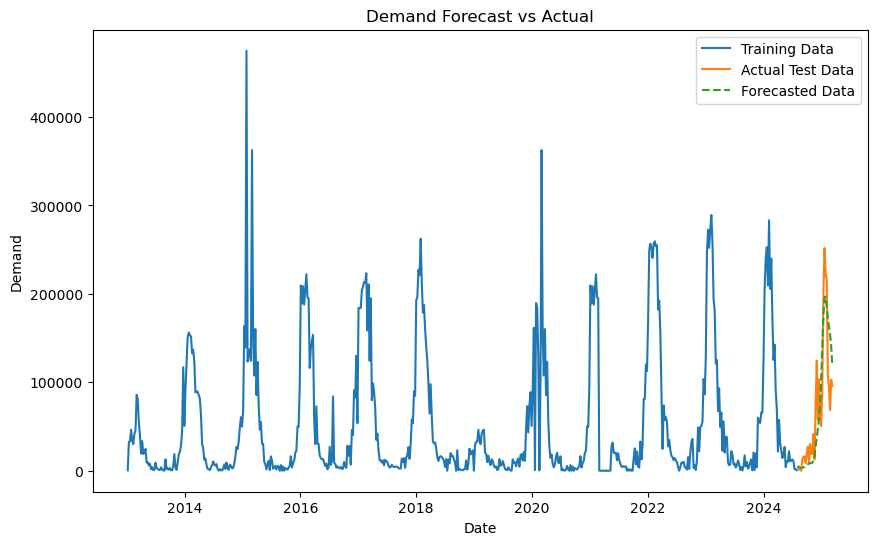

In [208]:
# Optional: Plot the forecast and the actual test data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
plt.plot(test_df['ds'], test_df['yhat'], label='Forecasted Data', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Forecast vs Actual')
plt.legend()
plt.show()

In [222]:
import streamlit as st
import pickle
import os
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [223]:
# Load the saved model
with open("./product_4A297_model.pkl", "rb") as model_file:
    loaded_model_data = pickle.load(model_file)

In [225]:
loaded_model = loaded_model_data["best_model"]
params = loaded_model_data["best_params"]
actual_df = loaded_model_data["actual_df"]
periods = loaded_model_data["periods"]
freq = loaded_model_data["freq"]

In [226]:
train_size = int(len(actual_df) * 0.95)
train_df = actual_df.iloc[:train_size][["ds", "y"]]
test_df = actual_df.iloc[train_size:][["ds", "y"]]

In [227]:
model_80_20 = Prophet(
    changepoint_prior_scale=params['changepoint_prior_scale'],
    seasonality_prior_scale=params['seasonality_prior_scale'],
    holidays_prior_scale=params['holidays_prior_scale'],
    seasonality_mode=params['seasonality_mode']
)

In [228]:
model_80_20.fit(train_df)

19:39:08 - cmdstanpy - INFO - Chain [1] start processing
19:39:08 - cmdstanpy - INFO - Chain [1] done processing
